# <center>Identification of birds species using deep learning approaches</center>

--------------------------------------------------------------------------------------------------------

### &rarr; Data Description
#### The dataset of 4000 images has been provided by <mark>BBC Autumnwatch</mark> for the object detection. There are 4 classes of birds species, each class contain 1000 images. The names of each class are listed below:

<ol>
  <li>Erithacus_rubecula</li>
  <li>Pica_pica</li>
  <li>Periparus_ater</li>
  <li>Turdus_merula</li>
</ol>

#### In this task, first three classes of the birds species has been chosen as a dataset input for deep learning Convolutional Neural Network (CNN) architectures.

<ol>
  <li>Erithacus_rubecula</li>
  <li>Pica_pica</li>
  <li>Periparus_ater</li>
</ol>

---------------------------------------------------------------------------------------------------------

### &rarr; Deep Learning Convolutional Neural Network (CNN) Architectures

#### Two different CNN architectures has been used in this task to train two differnet object detection models. The purpose of using two CNN architectures is to make a comparison between each other and check which object detection model yields the best results.

---------------------------------------------------------------------------------------------------------

## <ins>Following are the required python libraries or packages<ins>

In [4]:
import os # Importing this library so we ca interact with the operating system and can access directories we want
import pandas as pd # Python library for the analysis and manipulation of the data
import numpy as np # for data structure arrays and mathematical operations 

import seaborn as sns # To draw attractive and informative statistical grpahs
import matplotlib.pyplot as plt # To create figures and plots

from matplotlib.image import imread # To get image data in the form of numpy arrays

# This will show matplotlib plots in the same window not in separate window                                                                               
%matplotlib inline 

from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For image augmentation and pre-processing 
from PIL import Image # Python image library to deal with the images
from mpl_toolkits.axes_grid1 import ImageGrid # To display the images in grid

---------------------------------------------------------------------------------------------------------

# <ins>Data Pre-processing and Tagging</ins>

#### In this phase, we will be doing following steps to the dataset which has been given by BBC Autumnwatch.

<ol>
    <li>Tagging of three distinct bird classes</li>
    <li>Splitting the data into train/test sets</li>
    <li>Generating TF record files for model training</li>
<ol>

---------------------------------------------------------------------------------------------------------

### <ins>Data after removing unwanted images</ins>

#### In the dataset we had 3000 images for three bird classes Erithacus_rubecula, Pica_pica and Periparus_ater. From these images we saw some images which were not containing any bird so we dropped it out. Now after refining the dataset we remain with the following number of images for each class.
 
| Classes | Number of Images |
| --- | --- |
| Erithacus_rubecula | 1000 |
| Periparus_ater | 989 |
| Pica_pica | 954 |

#### <center><b>Table 1</b></center>

--------------------------------------------------------------------------------------------------------

### <ins>Data after counting each object in the image</ins>

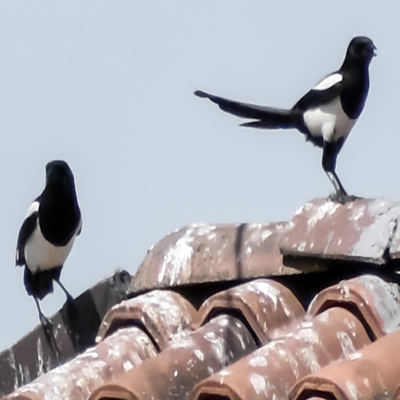

In [5]:
img = Image.open("Images_with_Multiple_Objects/Pica_pica_739.jpg") # Path to get the image from the folder
newsize = (400, 400)
img = img.resize(newsize)
# This method will show image in image viewer 
img.show() 

#### In our dataset we can see multiple birds in the same image as shown above, so we counted all the objects or birds manually. After counting all the objects, our dataset have following number of objects for each class.

| Classes | Total images | Number of objects |
| --- | --- | --- |
| Erithacus_rubecula | 1000 | 1010 |
| Periparus_ater | 989 | 1002 |
| Pica_pica | 954 | 1040 |

#### <center><b>Table 2</b></center>

#### Note: This technique is not suitable if we will have large datasets. We can detect automatically after labelling the image, by counting the number of bounding boxes in the XML files generated during labelling. 

---------------------------------------------------------------------------------------------------------

### <ins>Class Balancing</ins>

#### From Table 2, it can be seen that in the dataset classes are not balanced, number of objects for each class is different. To balance all the classes with the same number of objects downsampling, technique has been used. We removed 10 objects from Erithacus_rubecula, 2 from Periparus_ater and 40 from Pica_pica.

| Classes | Total images | Number of objects |
| --- | --- | --- |
| Erithacus_rubecula | 987 | 1000 |
| Periparus_ater | 984 | 1000 |
| Pica_pica  | 923 | 1000 |

#### <center><b>Table 3</b></center>

#### From Table 3, it can be seen that all the classes are balanced with the same number of objects.

#### Note: As we can see from the Table 2 we do not have a huge difference between the number of objects of all classes. If we do not balance it this is also acceptable as this will not affect the model performance because of not having huge differnce between classes.

#### If there is a huge difference between the classes than we can use data augmentation for oversampling.

---------------------------------------------------------------------------------------------------------

## <ins>Tagging</ins>

#### For the object detection deep learning model it is better to label or tag the images before passing to model for training because this process can gives you the better model performance, accuracy and reliablity.

#### To accomplish this task we used <mark>ReNomTAG</mark> tool. ReNomTAG is a GUI application for creating image recognition training data, in which we create a bounding box around the object and label it with the respective class name. Labeled data that is used to tell a deep learning model the information of the region of the target object.

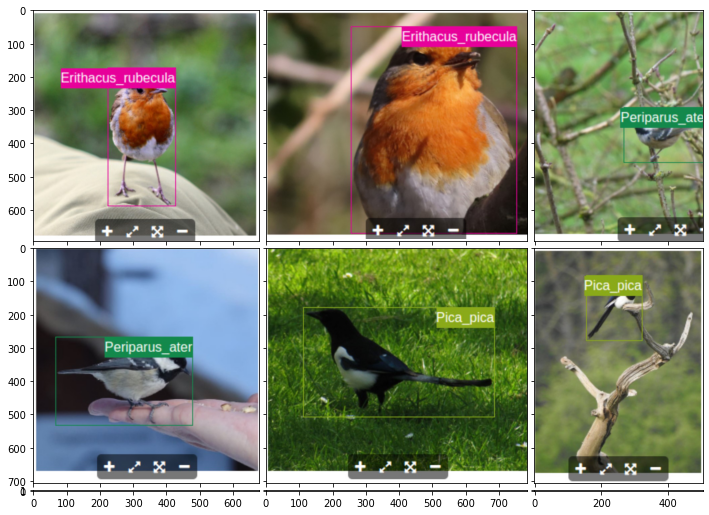

In [6]:
# Following code is to get the path of 6 labelled images, 2 each class. 
# After that we are displaying in a grid using "ImageGrid" method.

img1 = Image.open("labelled_Images/Erithacus_rubecula_label.jpg")
img2 = Image.open("labelled_Images/Erithacus_rubecula_label1.jpg")
img3 = Image.open("labelled_Images/Periparus_ater.jpg")
img4 = Image.open("labelled_Images/Periparus_ater1.jpg")
img5 = Image.open("labelled_Images/pica_pica.jpg")
img6 = Image.open("labelled_Images/pica_pica1.jpg")

fig = plt.figure(figsize=(12., 18.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 3x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [img1, img2, img3, img4, img5, img6]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()


#### From above grid, it can be seen that all the images has been labelled using <mark>ReNomTAG</mark> tool. Here each bounding box shows one object in the image.

---------------------------------------------------------------------------------------------------------

## <ins>Check dimension of the images</ins>

In [7]:
width = [] # To save the width of all the images
height = [] # To save the height of all the images
count_xml_files = 0 # To count total number of xml files in the images folder
for image_filename in os.listdir('./images'): # for loop to get all the files from images folder 
    name, ext = os.path.splitext(image_filename) # get the name and file format/extension of the file
    try:
        if not ext == '.xml': # condition: to check if file extension is not xml
            img = imread('./images/'+image_filename) # Read each image using directory path and filename
            d1,d2, color = img.shape # get the shape of the image and extract width and height
            width.append(d1) # push width of each image in width array
            height.append(d2) # push height of each image in height array
        elif ext == '.xml':
            count_xml_files = count_xml_files + 1
        else:
            print("Nothing Found")
            
    except: # if ext is undefined than this exception will throw
        print(image_filename)
        continue

test
cleaned
train


In [8]:
len(width) # Total number 

2894

In [9]:
len(height) # Total number

2894

In [10]:
print(count_xml_files)

2894


From above outputs, it can be seen that there are <mark>2894</mark> images in the <mark>images</mark> folder and also the count of <mark>xml</mark> files also the same.

### Let's see the dimensions of all the images using seaborn <mark>jointplot</mark>                

In [11]:
Dimensions=pd.DataFrame([], columns=['width', 'height']) # make a dataframe so it can be pass to jointplot for visualisation
Dimensions.width = width # assign width array to width column of dataframe
Dimensions.height = height  # assign height to height column of dataframe

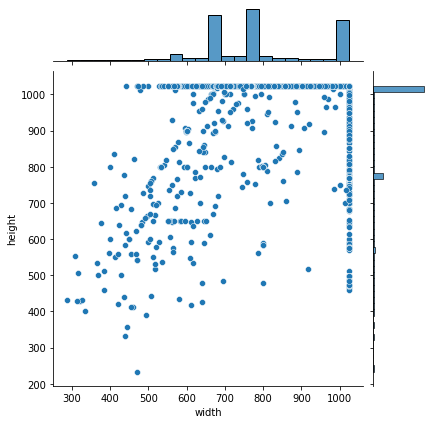

In [12]:
sns.jointplot(data = Dimensions, x='width', y='height')

#### From above joint plot, vertical axis shows the height of all the images and horizontal axis shows the width of all the images. 

In [14]:
print('Min width:', np.min(width))
print('Max width:', np.max(width))

Min: 288
Max: 1024


In [15]:
print('Min height:', np.min(height))
print('Max height:', np.max(height))

Min height: 234
Max height: 1024


#### From the above output, it can be seen that the maximum dimension value is <mark>1024</mark> so it's better to chose the architecture having resizer <mark>1024x1024</mark>. Otherwise if we will use lesser resolution it can loss some information by taking some pixels out.

---------------------------------------------------------------------------------------------------------

## <ins>Clean the XML</ins>

In [16]:
!python xmlconversion.py --verbose # This script remove the spaces in all the xml files

images/Pica_pica_506.xml
images/Periparus_ater_936.xml
images/ErithacusRubecula0060.xml
images/Pica_pica_197.xml
images/Pica_pica_861.xml
images/Pica_pica_674.xml
images/ErithacusRubecula1062.xml
images/Pica_pica_398.xml
images/Periparus_ater_1050.xml
images/Periparus_ater_1083.xml
images/ErithacusRubecula0099.xml
images/Pica_pica_271.xml
images/Periparus_ater_973.xml
images/Pica_pica_697.xml
images/Pica_pica_456.xml
images/ErithacusRubecula0219.xml
images/Periparus_ater_985.xml
images/Periparus_ater_1230.xml
images/Periparus_ater_46.xml
images/ErithacusRubecula0290.xml
images/ErithacusRubecula0621.xml
images/ErithacusRubecula0759.xml
images/Periparus_ater_1079.xml
images/ErithacusRubecula1044.xml
images/Pica_pica_39.xml
images/Pica_pica_799.xml
images/Pica_pica_875.xml
images/ErithacusRubecula0719.xml
images/Pica_pica_513.xml
images/Periparus_ater_592.xml
images/Periparus_ater_476.xml
images/Pica_pica_341.xml
images/Periparus_ater_484.xml
images/Pica_pica_518.xml
images/Periparus_ater

Above command will create a new directory named <mark>cleaned</mark> under./images. After the script has been executed, copy the contents back to /images, overwriting existing xml. 

---------------------------------------------------------------------------------------------------------

## <ins>Patition the train / test split 90/10</ins>

#### Here we will split our data into 90/10 rule, 90% for the train and 10% for the test. The purpose of data splitting to evaluate our model performance. The train data is to fit the model and to test is for the predictions.

In [17]:
!python partition_dataset.py -x -i ./images -r 0.1 # This script will divide the dataset of images into two parts by creating two folders, train and test

---------------------------------------------------------------------------------------------------------

## <ins>Create the TF Record</ins>

#### For storing a sequence of binary records

### *Update the .PBTXT file*

#### Here we are updating the <mark>label_map.pbtxt</mark> file. This file will be used to give the labels during classification. For this dataset we have three objects/items in this file, each represents each class.

<ol>
    <li>
        Erithacus_rubecula
    </li>
    <li>
        Periparus_ater
    </li>
    <li>
        Pica_pica
    </li>
</ol>

In [18]:
!code './data/label_map.pbtxt'

### *Create the TF Record (Train)*

In [19]:
!python generate_tfrecord.py -x images/train -l data/label_map.pbtxt -o data/train.record # For storing a sequence of binary records

Successfully created the TFRecord file: data/train.record


### *Create the TF Record (Test)*

In [20]:
!python generate_tfrecord.py -x images/test -l data/label_map.pbtxt -o data/test.record # For storing a sequence of binary records

Successfully created the TFRecord file: data/test.record


---------------------------------------------------------------------------------------------------------